# An analysis of rock density as a function of signal strength

## Random forests and boosted decision trees are used and compared with other regression techniques

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [3]:
df.columns = ['Signal', 'Density']

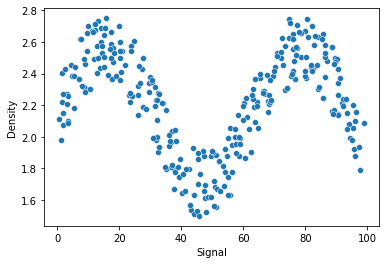

In [4]:
sns.scatterplot(x='Signal', y='Density', data=df)
plt.show()

In [5]:
X = df.Signal.values.reshape(-1, 1)
y = df.Density

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Linear regression model

In [7]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [8]:
lin_preds = lin_model.predict(X_test)

In [9]:
print(mean_absolute_error(y_test, lin_preds))
print(mean_squared_error(y_test, lin_preds, squared=False))

0.211198973318633
0.2570051996584629


In [10]:
signal_range = np.arange(0, 100)
signal_preds = lin_model.predict(signal_range.reshape(-1, 1))

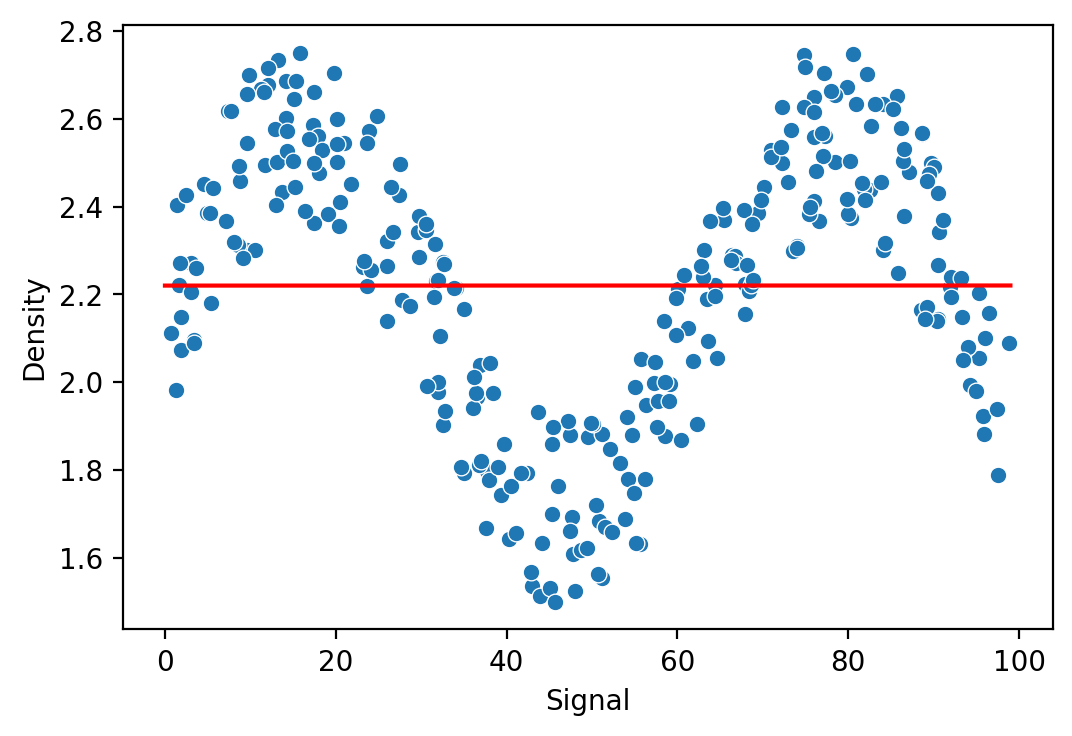

In [11]:
plt.figure(dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)
plt.plot(signal_range, signal_preds, color='red')
plt.show()

## Function to quickly test various models

In [12]:

def run_model(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):

    '''
    Function to test models quickly
    '''

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)

    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))

    plt.figure(dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df)
    plt.plot(signal_range, signal_preds, color='red')
    plt.show()

## Polynomial regression (with degree of 6)

RMSE: 0.13807463509811987
MAE: 0.11969137702563783


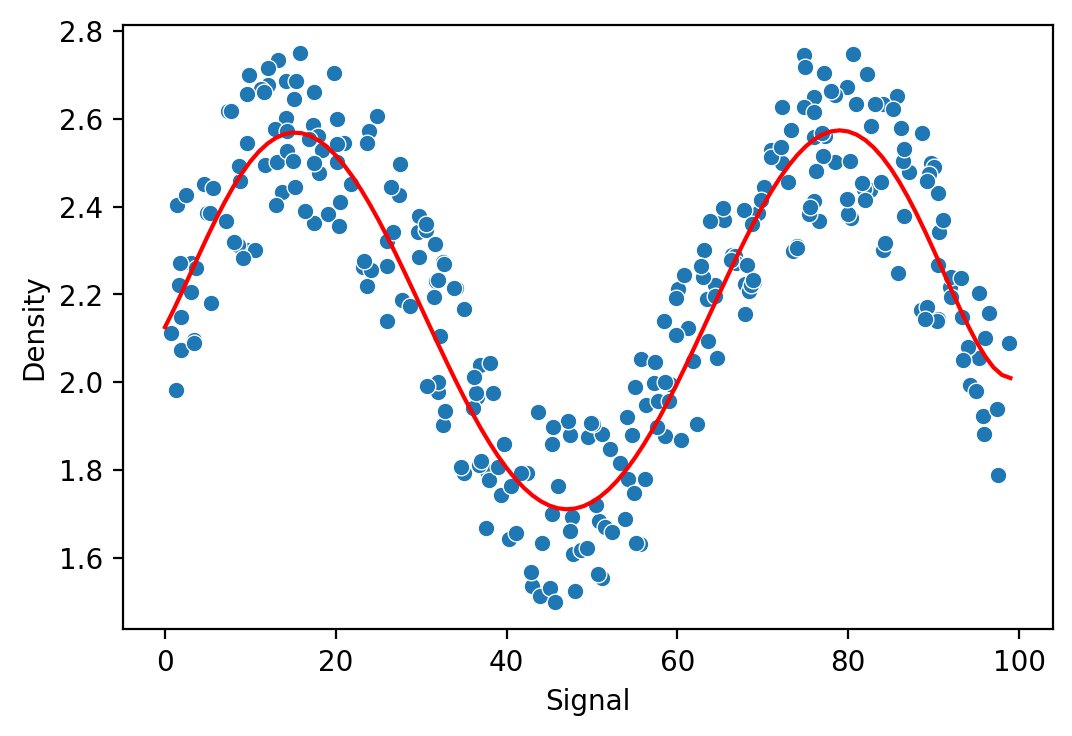

In [13]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe)

In [14]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train)

PolynomialFeatures(degree=3)

## K Nearest Neighbours (with k values of 1, 5, and 10)

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


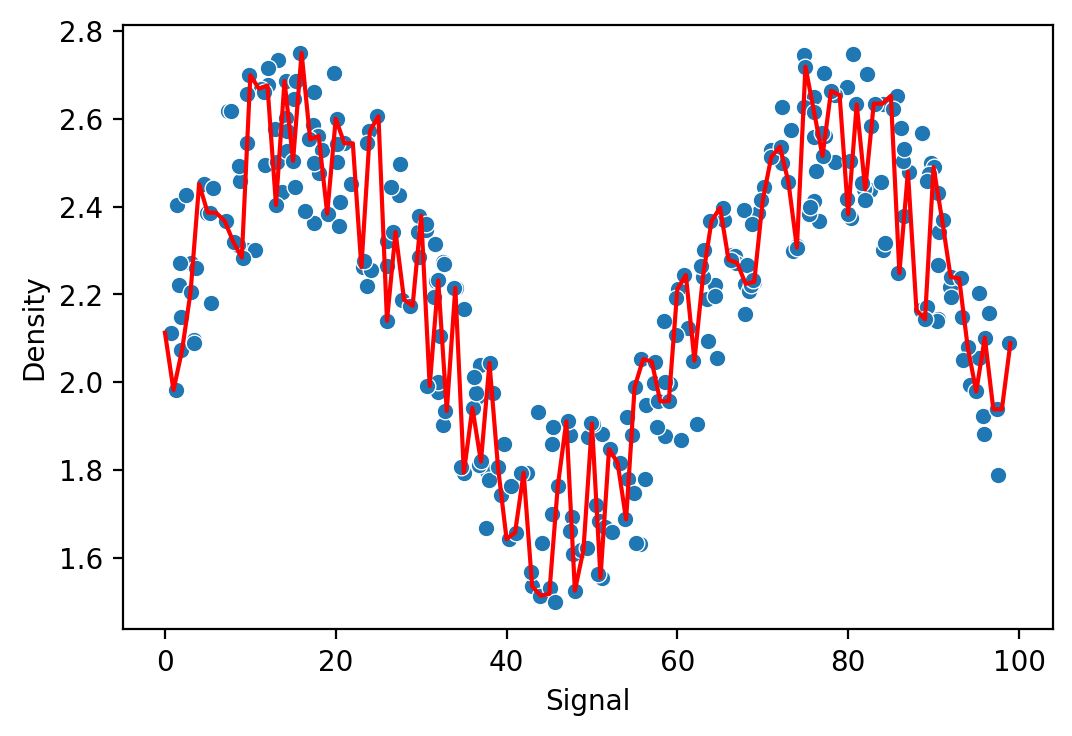

RMSE: 0.13730685016923647
MAE: 0.12198383614100558


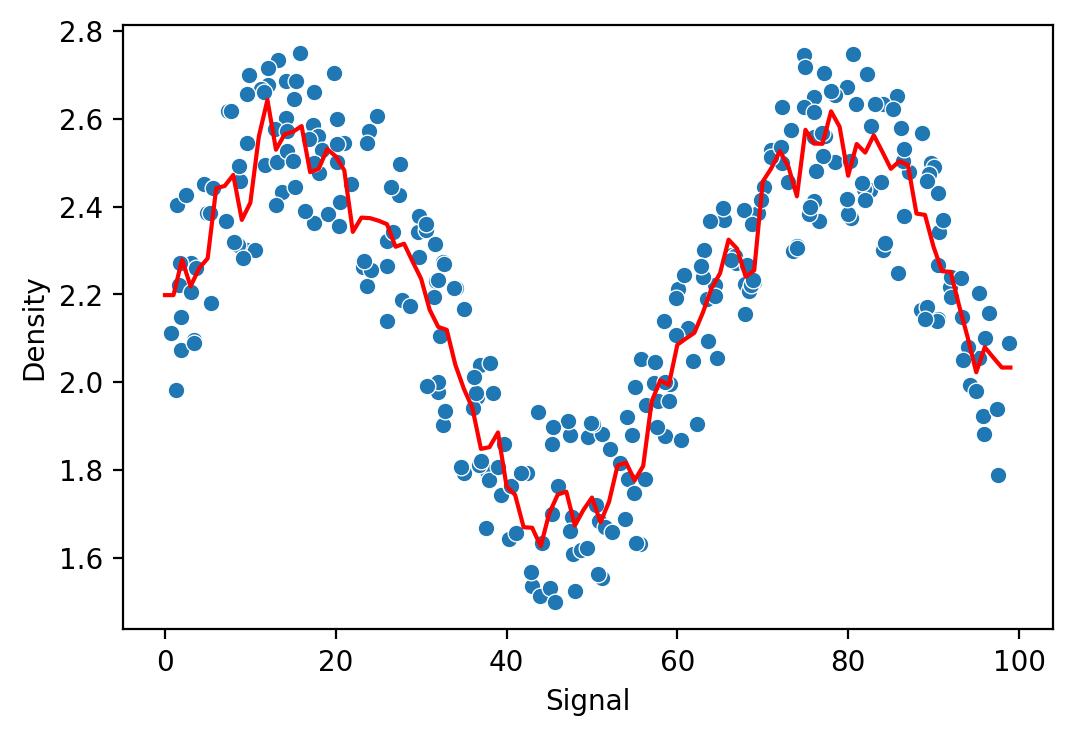

RMSE: 0.13277855732740926
MAE: 0.11635971693292672


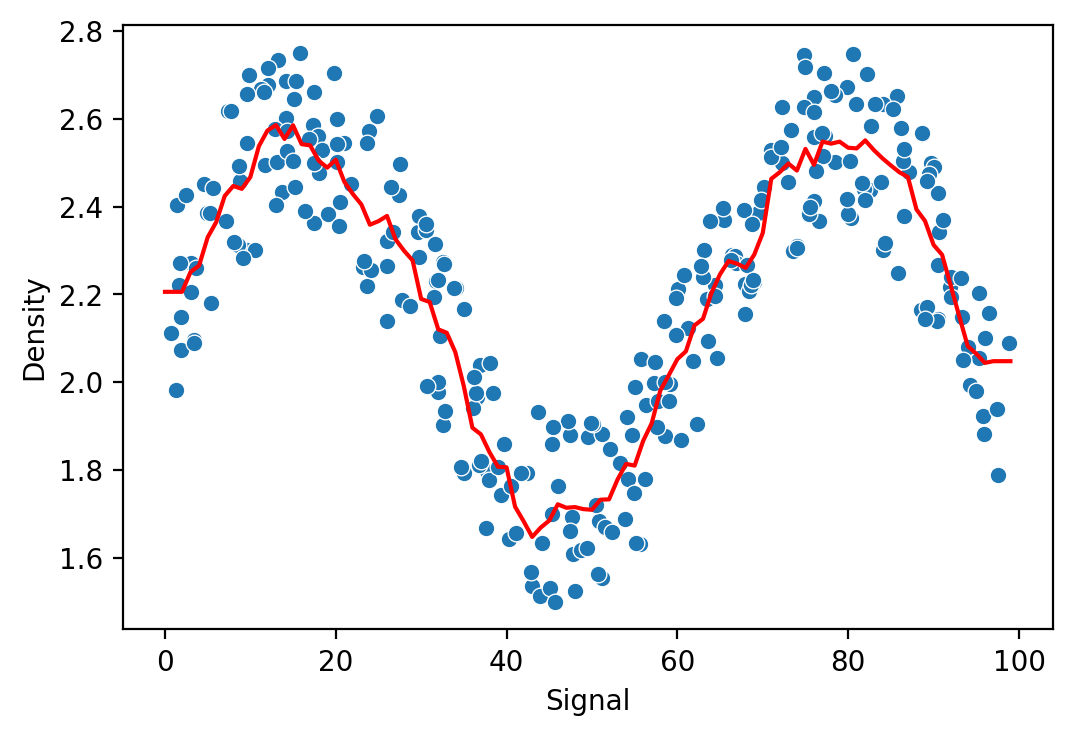

In [16]:
k_values = [1, 5, 10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model)

## Decision tree model

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


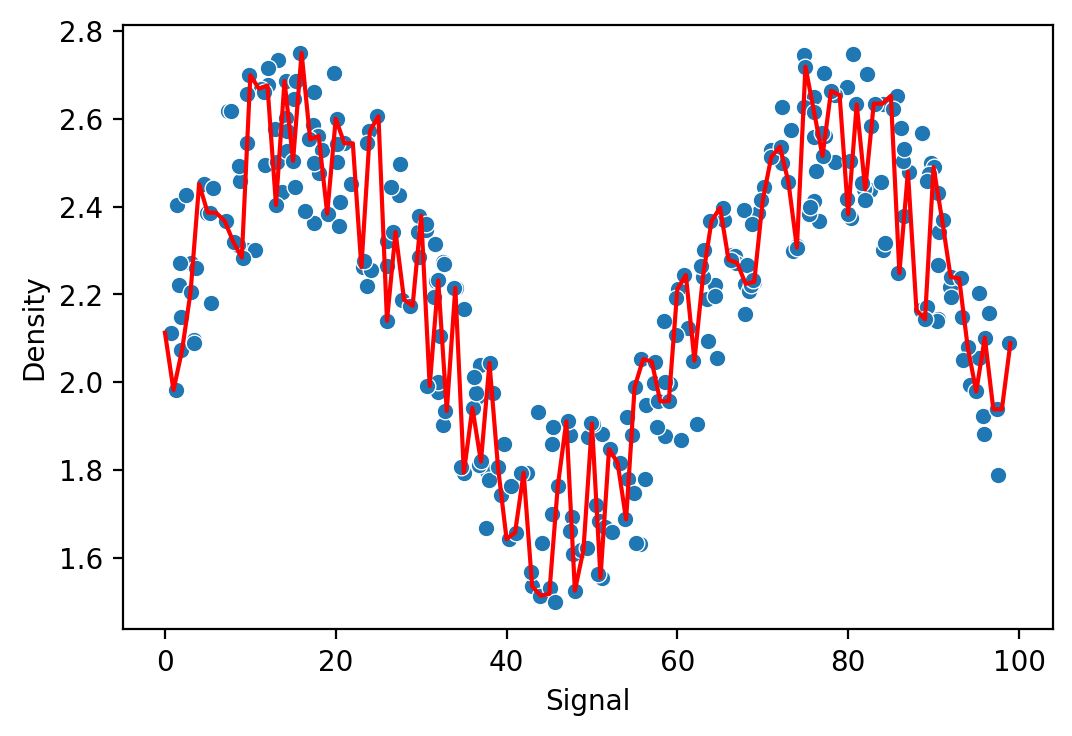

In [18]:
model = DecisionTreeRegressor()

run_model(model)

## Support Vector Regressor model

RMSE: 0.12646999302043452
MAE: 0.10854210121342305


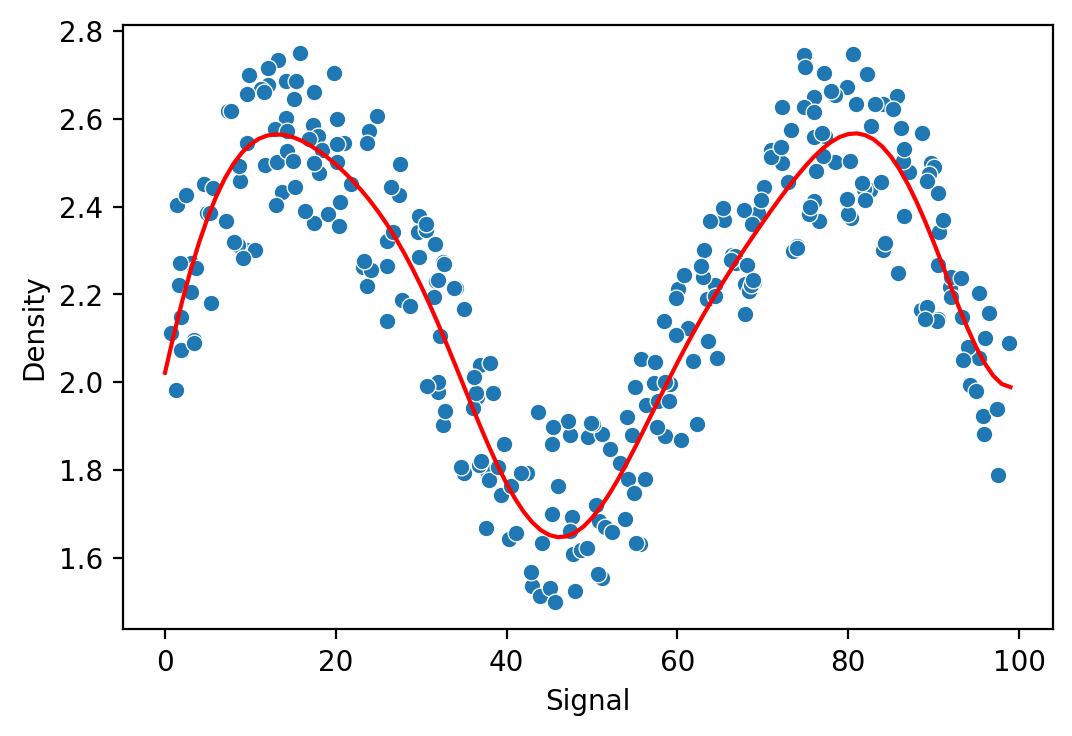

In [21]:
svr = SVR()

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma': ['auto', 'scale']
}

grid = GridSearchCV(svr, param_grid=param_grid)

run_model(grid)

## Random forest regressor model

RMSE: 0.13717829742100118
MAE: 0.10820873085751029


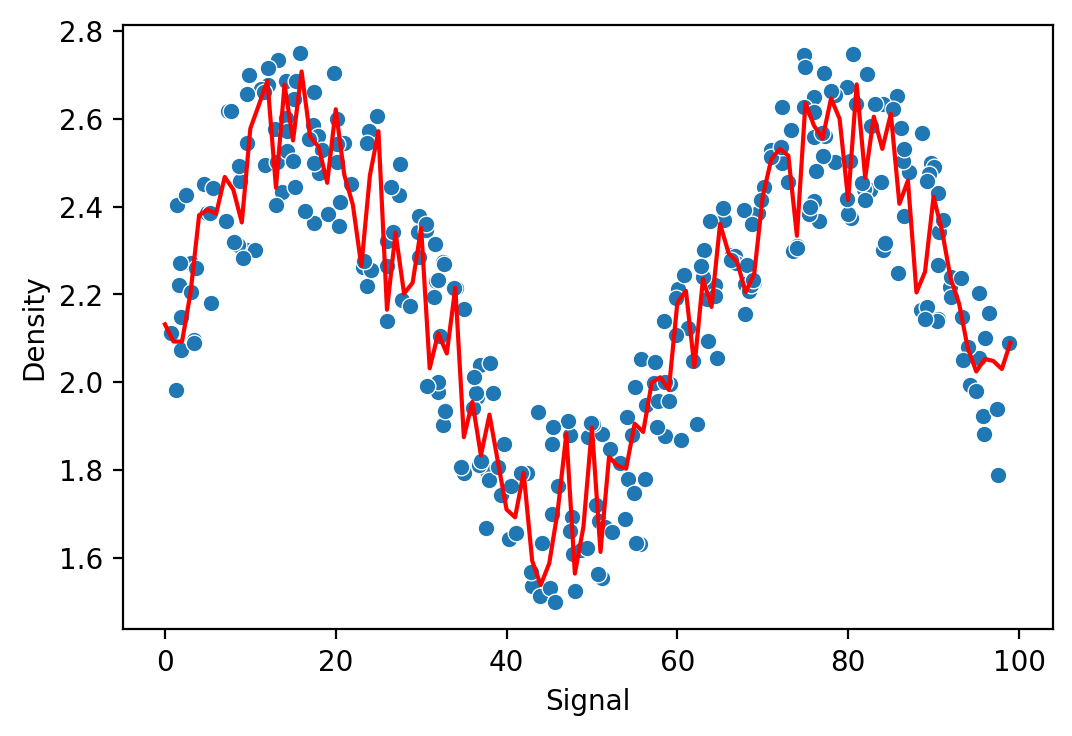

In [23]:
rfr = RandomForestRegressor(n_estimators=10)

run_model(rfr)

## Gradient boosted decision tree model

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


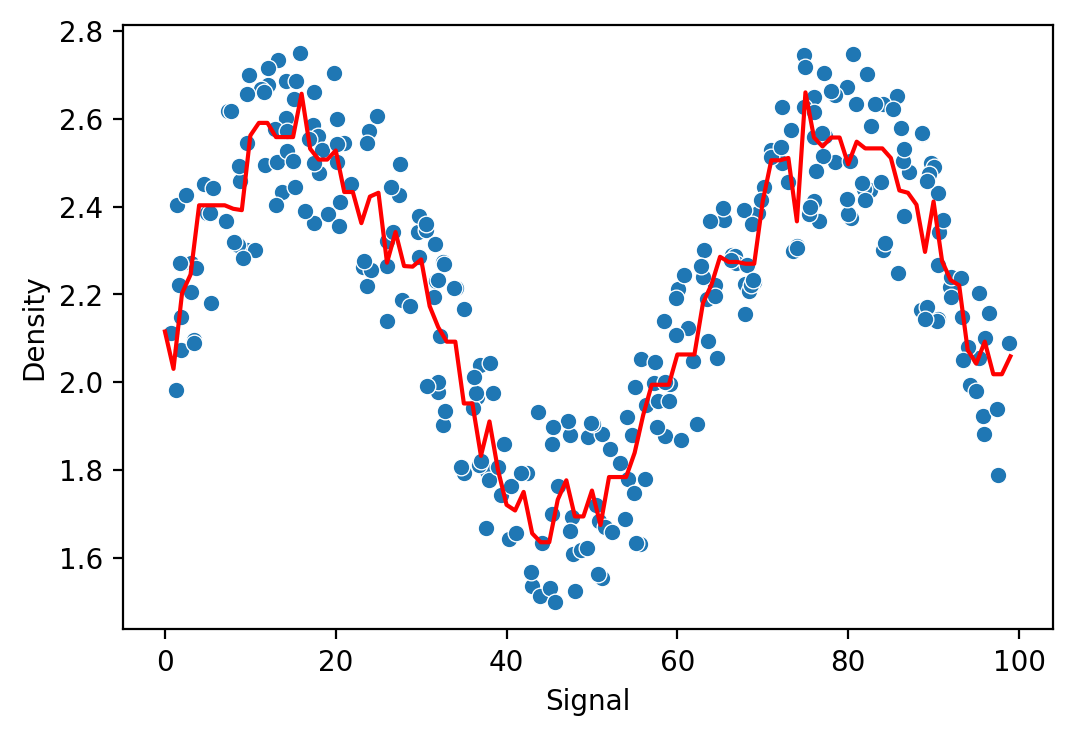

In [25]:
model = GradientBoostingRegressor()

run_model(model)

## Adaboosted decision tree model

RMSE: 0.13799468163567738
MAE: 0.11765984198128888


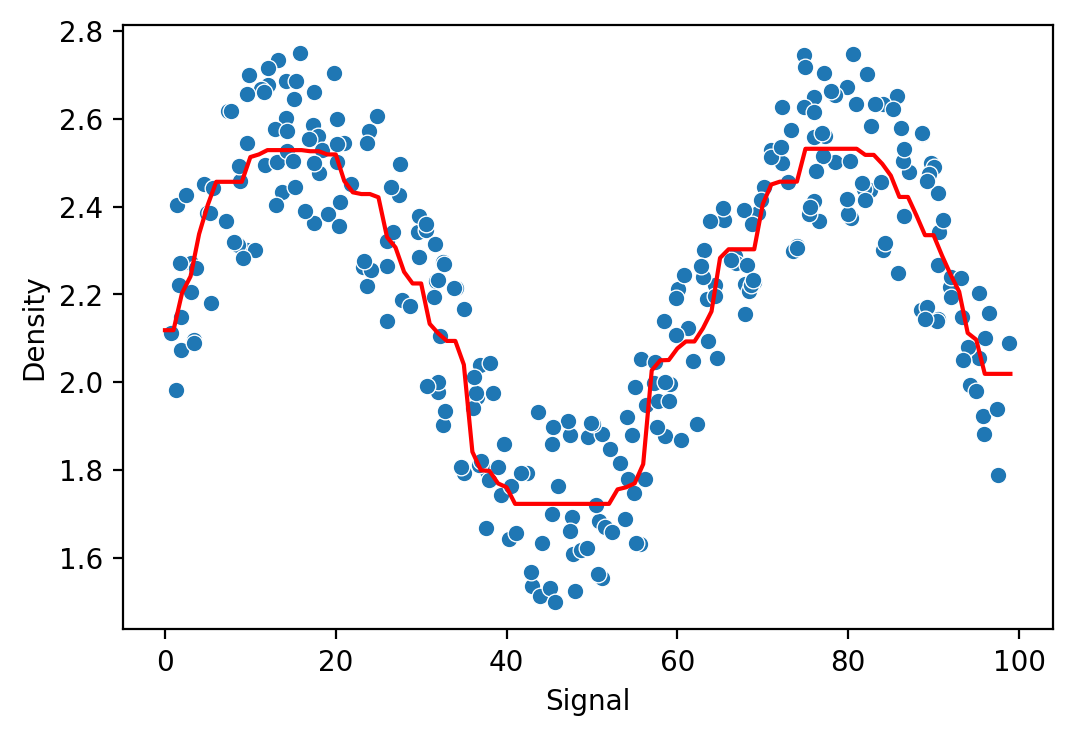

In [26]:
model = AdaBoostRegressor()

run_model(model)